# Predicting Customer Churn Prediction using machine learning

Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment

We're going to take the following approach:

1. Problem definition
2. Data
3. Data Preprocessing
4. Feature Engineering
5. Model Building
6. Model Optimization
7. Experimentation
8. Model Deployment

# 1.Problem Definition

At Sunbase, we prioritize understanding our customers and ensuring their satisfaction. To achieve this,
we want to develop a machine learning model that predicts customer churn. Your task as a Machine
Learning Intern is to work on this project, following the guidelines and responsibilities outlined in the job
description.

#   Features
* CustomerID	Name	
* Age	
* Gender	
* Location	
* Subscription_Length_Months	
* Monthly_Bill	
* Total_Usage_GB	
* Churn

# Preparing the tools

In [1]:
## Preparing the tools

# we gonna use matplotlib ,pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# import model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#we will compare all the models with each and other to get the best result


#model evaluation

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score


In [2]:
import warnings
warnings .filterwarnings("ignore")

# 2.Data(Load the data)

In [3]:
data=pd.read_csv('customer_churn_large_dataset.csv')

In [4]:
#let see the data(Data exploration)
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [5]:
#lets find out the data type of these features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
#Checking for null values in the given dataset(check if there are  missing values)
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

analyse the data

In [7]:
data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

### data['Churn'].value_counts().plot(kind='bar',color=['blue','orange'])

In [8]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


# Lets see  the relations between the features 

Between age and churn

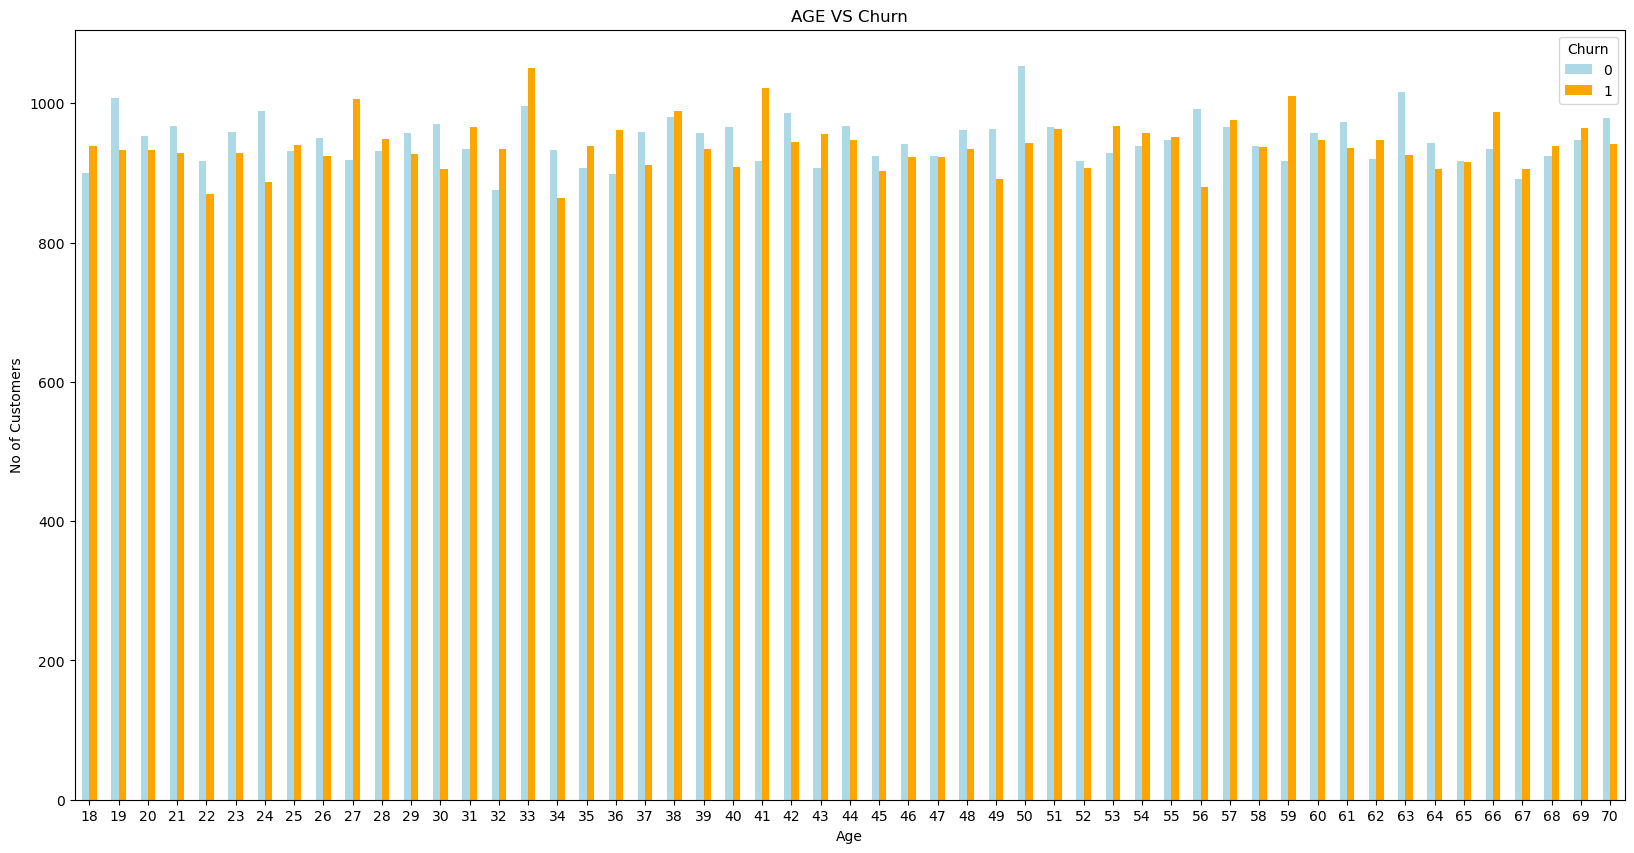

In [9]:
td=pd.crosstab(data.Age,data.Churn)
td.plot(kind="bar",figsize=(20,10),color=['lightblue','orange'])
plt.title("AGE VS Churn")
plt.xlabel("Age")
plt.ylabel("No of Customers");
plt.xticks(rotation=0);

age plot

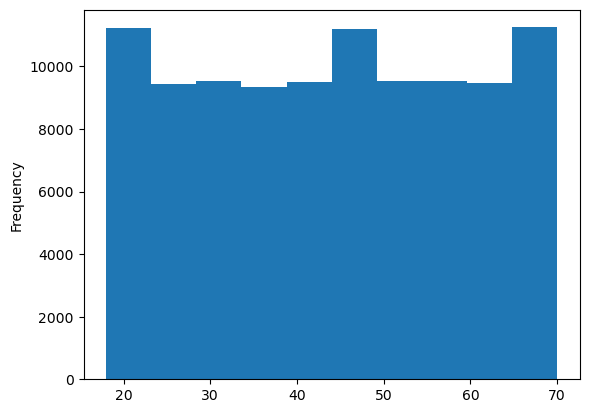

In [10]:
data.Age.plot.hist();


# Feature Engineering

We have to convert categorical variables into numerical varibles to train them

In [11]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [12]:
data_n=data.drop('Name',axis=1)

In [13]:
data_n

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,Male,Los Angeles,17,73.36,236,0
1,2,62,Female,New York,1,48.76,172,0
2,3,24,Female,Los Angeles,5,85.47,460,0
3,4,36,Female,Miami,3,97.94,297,1
4,5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,Male,Houston,23,55.13,226,1
99996,99997,62,Female,New York,19,61.65,351,0
99997,99998,64,Male,Chicago,17,96.11,251,1
99998,99999,51,Female,New York,20,49.25,434,1


Converting male and female to 1,0(Gender)

In [14]:
data_n['Gender'].replace(['Male','Female'],[1,0],inplace=True)

In [15]:
data_n

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,1,Los Angeles,17,73.36,236,0
1,2,62,0,New York,1,48.76,172,0
2,3,24,0,Los Angeles,5,85.47,460,0
3,4,36,0,Miami,3,97.94,297,1
4,5,46,0,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,1,Houston,23,55.13,226,1
99996,99997,62,0,New York,19,61.65,351,0
99997,99998,64,1,Chicago,17,96.11,251,1
99998,99999,51,0,New York,20,49.25,434,1


(location)

In [16]:
data_n['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [17]:
data_n

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,1,Los Angeles,17,73.36,236,0
1,2,62,0,New York,1,48.76,172,0
2,3,24,0,Los Angeles,5,85.47,460,0
3,4,36,0,Miami,3,97.94,297,1
4,5,46,0,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...
99995,99996,33,1,Houston,23,55.13,226,1
99996,99997,62,0,New York,19,61.65,351,0
99997,99998,64,1,Chicago,17,96.11,251,1
99998,99999,51,0,New York,20,49.25,434,1


# spliting the data


In [18]:
x=data_n.drop('Churn',axis=1)
y=data_n['Churn']

In [19]:
x

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,63,1,Los Angeles,17,73.36,236
1,2,62,0,New York,1,48.76,172
2,3,24,0,Los Angeles,5,85.47,460
3,4,36,0,Miami,3,97.94,297
4,5,46,0,Miami,19,58.14,266
...,...,...,...,...,...,...,...
99995,99996,33,1,Houston,23,55.13,226
99996,99997,62,0,New York,19,61.65,351
99997,99998,64,1,Chicago,17,96.11,251
99998,99999,51,0,New York,20,49.25,434


# use of one hot encoder

In [20]:
#turn the cateogorical into numbers(convert location to numerical)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Location']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder='passthrough')

transformed_x=transformer.fit_transform(x)
transformed_x

array([[  0.  ,   0.  ,   1.  , ...,  17.  ,  73.36, 236.  ],
       [  0.  ,   0.  ,   0.  , ...,   1.  ,  48.76, 172.  ],
       [  0.  ,   0.  ,   1.  , ...,   5.  ,  85.47, 460.  ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,  17.  ,  96.11, 251.  ],
       [  0.  ,   0.  ,   0.  , ...,  20.  ,  49.25, 434.  ],
       [  0.  ,   0.  ,   1.  , ...,  19.  ,  76.57, 173.  ]])

In [21]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,1.0,0.0,0.0,1.0,63.0,1.0,17.0,73.36,236.0
1,0.0,0.0,0.0,0.0,1.0,2.0,62.0,0.0,1.0,48.76,172.0
2,0.0,0.0,1.0,0.0,0.0,3.0,24.0,0.0,5.0,85.47,460.0
3,0.0,0.0,0.0,1.0,0.0,4.0,36.0,0.0,3.0,97.94,297.0
4,0.0,0.0,0.0,1.0,0.0,5.0,46.0,0.0,19.0,58.14,266.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,0.0,99996.0,33.0,1.0,23.0,55.13,226.0
99996,0.0,0.0,0.0,0.0,1.0,99997.0,62.0,0.0,19.0,61.65,351.0
99997,1.0,0.0,0.0,0.0,0.0,99998.0,64.0,1.0,17.0,96.11,251.0
99998,0.0,0.0,0.0,0.0,1.0,99999.0,51.0,0.0,20.0,49.25,434.0


# Training and test 

In [22]:
#spliting data into train and test sets 
np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

# Model Building

I am going to use all these models to check which one gives better score

1. AdaBoostClassifier
2. GradientBoostingClassifier
3. SGDClassifier
4. KNeighborsClassifier
5. RandomForestClassifier
6. XG BOOST
7. LIGHTGBM

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [42]:
#put models in a Dictionary

models={"ADABoost" : AdaBoostClassifier(),
       "GradientBoost":KNeighborsClassifier(),
        "SGDClassifier":SGDClassifier(),
        "KNeighborsClassifier":KNeighborsClassifier(),
       "RandomForestClassifier":RandomForestClassifier(),
       "XGBClassifier":XGBClassifier(),
       "LGBMClassifier":lgb.LGBMClassifier()}

#create a function
def fit_score(models,x_train,x_test,y_train,y_test):
    """"
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    np.random.seed(42)
    
    #make a dictionary to keep model score
    
    model_score={}
    
    #Loop through models
    
    for name,model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        #evaluate the model and append to its score to model score
        
        model_score[name]=model.score(x_test,y_test)
        
    return   model_score

In [43]:
model_scores = fit_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

  File "C:\Users\ASUS\focusprojects\project\heart_disease_proj\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\focusprojects\project\heart_disease_proj\env\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\focusprojects\project\heart_disease_proj\env\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ASUS\focusprojects\project\heart_disease_proj\env\Lib\subprocess.py", line 1509, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 39858, number of negative: 40142
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498225 -> initscore=-0.007100
[LightGBM] [Info] Start training from score -0.007100


{'ADABoost': 0.503,
 'GradientBoost': 0.49705,
 'SGDClassifier': 0.50375,
 'KNeighborsClassifier': 0.49705,
 'RandomForestClassifier': 0.4964,
 'XGBClassifier': 0.4984,
 'LGBMClassifier': 0.49505}

In [44]:
#Compare the model accurcy

<Axes: >

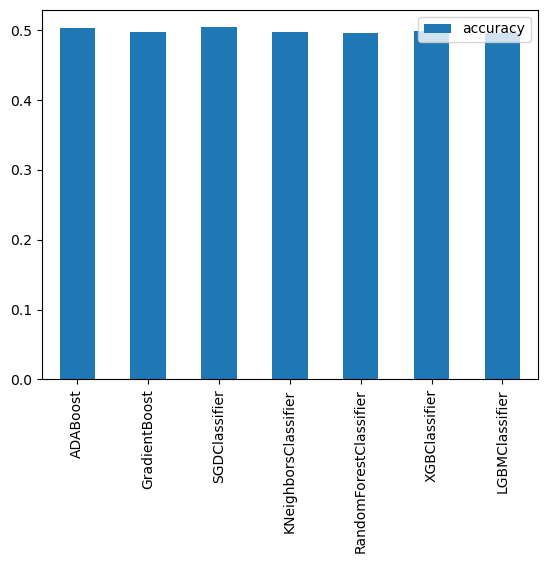

In [45]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()


# lets focus on SGDClassifier()

# Hyperparamter tuning with Randomized Search CV

In [46]:
#create a hyperparamter grid for SGDclassifier()

sgd_grid={"loss":['hinge','log_loss', 'modified_huber'],
         'alpha': [0.0001, 0.001, 0.01],
         'penalty': ['l2', 'l1', 'elasticnet'],
         'max_iter': np.arange(100,1000,100),
         "n_jobs":[-1],
         "learning_rate":['optimal','adaptive'],
         }

In [47]:
SGDClassifier()

SGDClassifier()

now we got hyperparamter grid setup for each of our model

In [49]:
#Tune Logistic  Regression

np.random.seed(42)

#Setup random hyperparameters search for Logistic Regression
rs_sgd=RandomizedSearchCV(SGDClassifier(),param_distributions=sgd_grid,cv=5,
                         n_iter=20,verbose=True)

#Fit random hyperparamter search model
rs_sgd.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SGDClassifier(), n_iter=20,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01],
                                        'learning_rate': ['optimal',
                                                          'adaptive'],
                                        'loss': ['hinge', 'log_loss',
                                                 'modified_huber'],
                                        'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'n_jobs': [-1],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   verbose=True)

In [50]:
rs_sgd.best_params_

{'penalty': 'l2',
 'n_jobs': -1,
 'max_iter': 200,
 'loss': 'log_loss',
 'learning_rate': 'optimal',
 'alpha': 0.0001}

In [51]:
rs_sgd.score(x_test,y_test)

0.50415

In [52]:
 sgd_grid2={"loss":['hinge', 'modified_huber'],
         'alpha': [0.0001, 0.001, 0.01],
         'penalty': ['l2', 'elasticnet'],
         'max_iter': [100, 500, 1000],
         "n_jobs":[-1],
         }

In [53]:
#Tune SGD  classification

np.random.seed(42)

#Setup random hyperparameters search for SGD
gs_sgd=GridSearchCV(SGDClassifier(),param_grid=sgd_grid2,cv=5,
                      verbose=True)

#Fit random hyperparamter search model
gs_sgd.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'loss': ['hinge', 'modified_huber'],
                         'max_iter': [100, 500, 1000], 'n_jobs': [-1],
                         'penalty': ['l2', 'elasticnet']},
             verbose=True)

In [54]:
gs_sgd.best_params_

{'alpha': 0.01,
 'loss': 'modified_huber',
 'max_iter': 500,
 'n_jobs': -1,
 'penalty': 'l2'}

In [55]:
gs_sgd.score(x_test,y_test)

0.49605

we input the best params we have

In [63]:
final_model = SGDClassifier(
    penalty='l2',           # Regularization term (l2 or l1)
    n_jobs=-1,              # Number of CPU cores to use for parallel processing (-1 means using all available cores)
    max_iter=200,           # Maximum number of iterations
    loss='log_loss',             # Loss function ('log' for logistic regression)
    learning_rate='optimal',# Learning rate ('optimal' adapts the learning rate automatically)
    alpha=0.0001            # Regularization strength
)

In [64]:
final_model.fit(x_train,y_train)

SGDClassifier(loss='log_loss', max_iter=200, n_jobs=-1)

In [65]:
final_model.score(x_test,y_test)

0.5039

# lets evaluate the model

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classififcation report

ACCURACY

In [71]:
from sklearn.model_selection import cross_val_score

cross_val_scores=cross_val_score(final_model,transformed_x,y,cv=5)

In [72]:
cross_val_scores

array([0.50285, 0.4978 , 0.5022 , 0.5022 , 0.4978 ])

In [74]:
cross_validated_accuracy = np.mean(cross_val_scores) * 100
print(f"Churn Prediction Cross-validated Accuracy: {cross_validated_accuracy:.2f}%")

Churn Prediction Cross-validated Accuracy: 50.06%


Area under ROC curve

In [79]:
from sklearn.metrics import roc_curve

final_model.fit(x_train,y_train)
#make predictions with probabilities
y_probs =final_model.predict_proba(x_test)

In [80]:
y_probs[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [81]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
fpr,tpr,threshols=roc_curve(y_test,y_probs_positive)

fpr

array([0.00000000e+00, 2.97648576e-04, 5.95297152e-04, 5.95297152e-04,
       1.00000000e+00])

create a function for plotting ROC curves


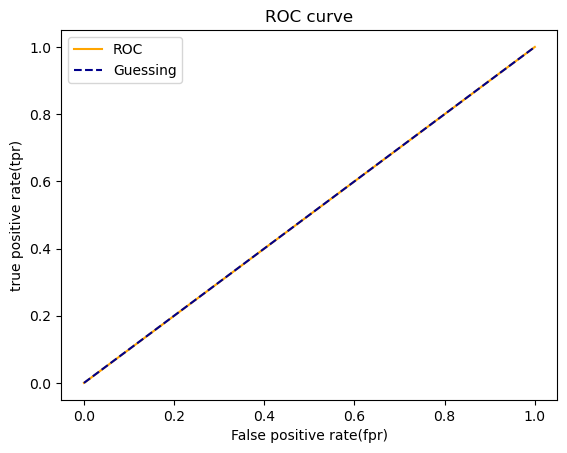

In [83]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle="--",label='Guessing')
    
    #customize plot
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel("true positive rate(tpr)")
    plt.legend()
    plt.title("ROC curve")
    plt.show()

plot_roc_curve(fpr,tpr)

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.4998535458597971

Confusion matrix

In [85]:
y_preds=final_model.predict(x_test)

In [86]:
pd.crosstab(y_test,y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,10076,3
1,9919,2


In [ ]:
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat=confusion_matrix(y_test,y_preds)

#plot it using seaborn
sns.heatmap(conf_mat);

In [87]:
final_model


SGDClassifier(loss='log_loss', max_iter=200, n_jobs=-1)

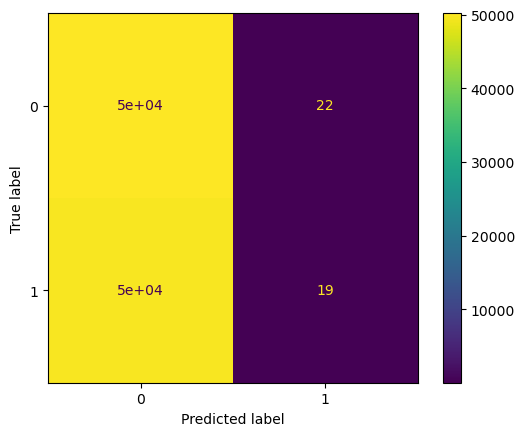

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=final_model,X=transformed_x,y=y)

Classification report

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10079
           1       0.40      0.00      0.00      9921

    accuracy                           0.50     20000
   macro avg       0.45      0.50      0.34     20000
weighted avg       0.45      0.50      0.34     20000



SGD model is giving the best result for each fold and fine tune the model to get the best results.